To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# No need for an open connection, as we're only doing a single query
engine.dispose()

In [3]:
student_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

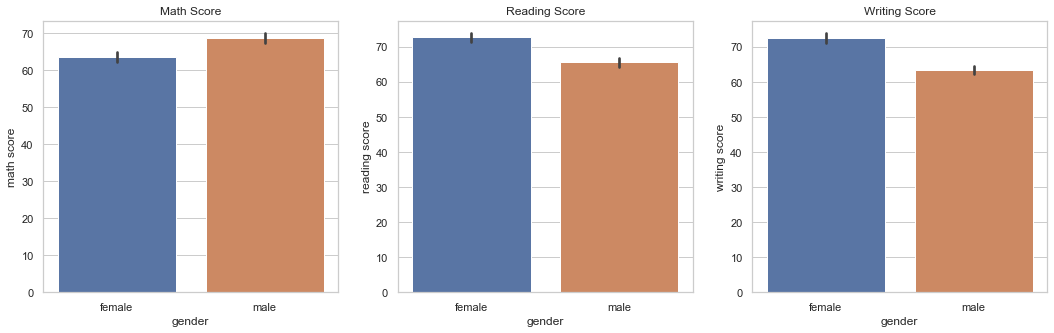

In [8]:
# Bar plots of exam scores by gender
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(student_df['gender'], student_df['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.barplot(student_df['gender'], student_df['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.barplot(student_df['gender'], student_df['writing score'])
plt.title('Writing Score')

plt.show()

In [24]:
# Test whether gender differences are significant
stats.ttest_ind(student_df[student_df['gender'] == 'female'][['math score', 'reading score', 'writing score']],
    student_df[student_df['gender'] == 'male'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

### Females have significantly lower math scores and significantly higher reading and writing scores than males.

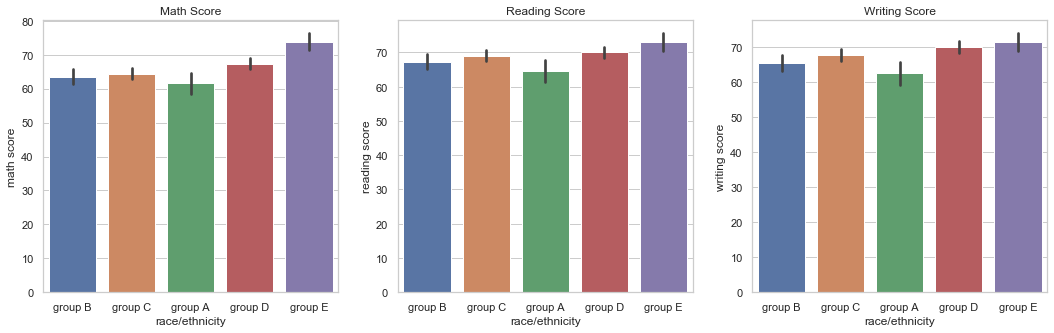

In [10]:
# Bar plots of exam scores by ethnicities
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.barplot(student_df['race/ethnicity'], student_df['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.barplot(student_df['race/ethnicity'], student_df['writing score'])
plt.title('Writing Score')

plt.show()

In [26]:
# Test whether ethnicity differences are significant
ethnicities = student_df['race/ethnicity'].unique()
grouped_df = student_df.groupby('race/ethnicity')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print('t-test between groups {0} and {1}:'.format(ethnicities[i], ethnicities[j]))
            print(stats.ttest_ind(
                student_df[student_df['race/ethnicity']==ethnicities[i]][var], 
                student_df[student_df['race/ethnicity']==ethnicities[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


### There are significant differences in test scores between the ethnicities, with groups D and E scoring the highest and group A scoring the lowest. Many of these differences are statistically significant (p-values less than 0.5).

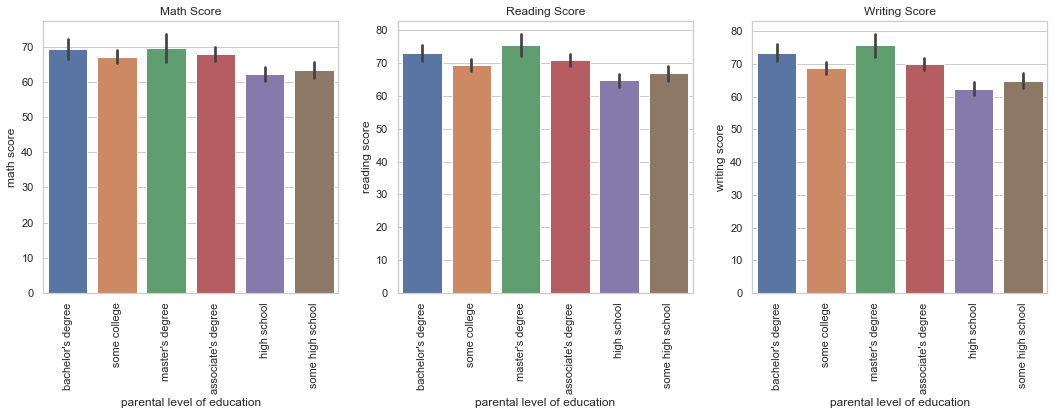

In [17]:
# Bar plots of exam scores by parental level of education
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(student_df['parental level of education'], student_df['math score'])
plt.xticks(rotation='vertical')
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.barplot(student_df['parental level of education'], student_df['reading score'])
plt.xticks(rotation='vertical')
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.barplot(student_df['parental level of education'], student_df['writing score'])
plt.xticks(rotation='vertical')
plt.title('Writing Score')

plt.show()

In [27]:
# Test whether parental education level differences are significant
level = student_df['parental level of education'].unique()
grouped_df = student_df.groupby('parental level of education')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(level)):
        for j in range(i+1, len(level)):
            print('t-test between groups {0} and {1}:'.format(level[i], level[j]))
            print(stats.ttest_ind(
                student_df[student_df['parental level of education']==level[i]][var], 
                student_df[student_df['parental level of education']==level[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

### There are significant differences in test scores between the parental education levels, with students of parents who went to college scoring better than those with parents who only attended high school. Many of these differences are statistically significant (p-values less than 0.5).

## 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?


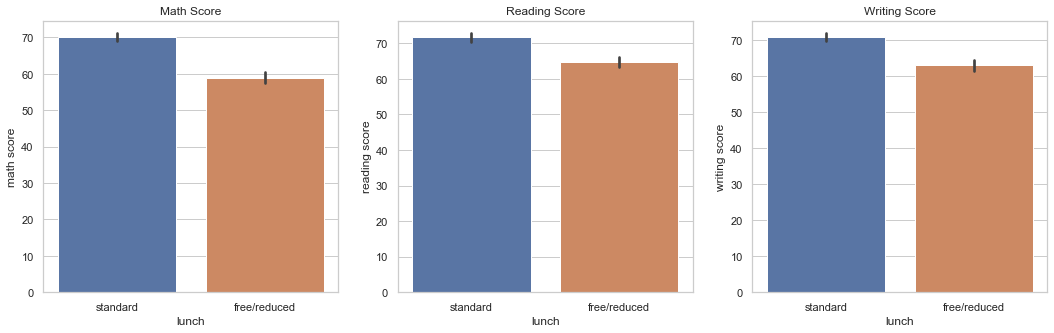

In [29]:
# Bar plots of exam scores by lunch types
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(student_df['lunch'], student_df['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.barplot(student_df['lunch'], student_df['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.barplot(student_df['lunch'], student_df['writing score'])
plt.title('Writing Score')

plt.show()

In [30]:
stats.ttest_ind(student_df[student_df['lunch'] == 'standard'][['math score', 'reading score', 'writing score']],
    student_df[student_df['lunch'] == 'free/reduced'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

### Students who receive free/reduced lunch do significantly worse on math, reading, and writing exams than students who receive standard lunch. This difference is likely due to socioecononmic differences between the two groups of students, with lower socioecononmic status correlating with reduced test scores (less parental support, less time for homework/study due to financial/familial responsibilities, reduced access to internet/resources, etc).

## 3. Does the test preparation course seem to have an effect on the exam performances?

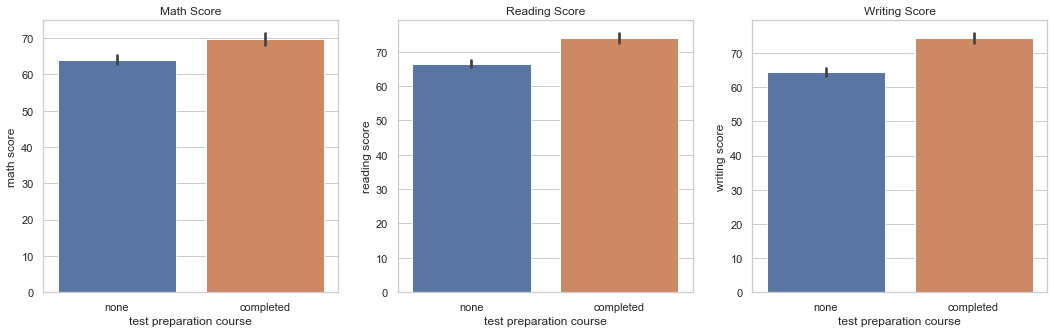

In [31]:
# Bar plots of exam scores by test prep course completion
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(student_df['test preparation course'], student_df['math score'])
plt.title('Math Score')

plt.subplot(1, 3, 2)
sns.barplot(student_df['test preparation course'], student_df['reading score'])
plt.title('Reading Score')

plt.subplot(1, 3, 3)
sns.barplot(student_df['test preparation course'], student_df['writing score'])
plt.title('Writing Score')

plt.show()

In [32]:
stats.ttest_ind(student_df[student_df['test preparation course'] == 'completed'][['math score', 'reading score', 'writing score']],
    student_df[student_df['test preparation course'] == 'none'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

### Yes, students who completed the test preparation course scored significantly higher on all three exames than those who did not.

## 4. Which 2 exam scores are most correlated with each other?  

In [5]:
# Get correlation matrix for student test data
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


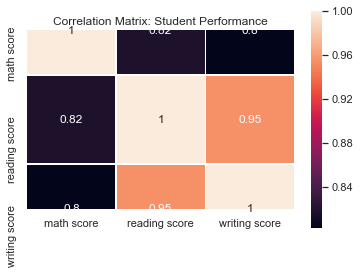

In [6]:
# Make the correlation matrices
corrmat_student = student_df.corr()

# Draw heatmap using seaborn
sns.heatmap(corrmat_student, square=True, annot=True, linewidths=0.5)
plt.title('Correlation Matrix: Student Performance')

plt.show()

### The reading and writing scores are the most highly correlated with each other.